# Installing required libraries

In [3]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Step 1: Import Libraries

In [5]:
# Import necessary libraries
import pandas as pd

# Load the dataset using the correct file path
file_path = 'C:/Users/Suryanshi/Desktop/MY DA PROJECTS/Machine Learning Internship/Task_2/Mall_Customers.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to ensure it's loaded correctly
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# Step 2: Select Relevant Features

In [6]:
# Select relevant features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Step 3: Normalize the Data

In [7]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Use Elbow Method to Find Optimal Number of Clusters

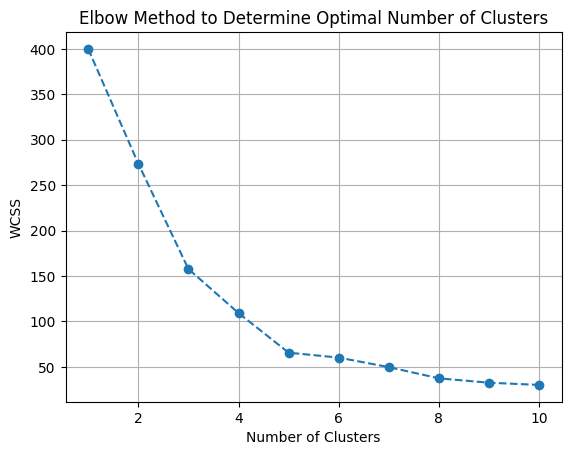

In [8]:
# Calculate WCSS for different numbers of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values to visualize the elbow point
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Step 5: Apply K-Means with Optimal Clusters

In [9]:
# Apply KMeans clustering with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = y_kmeans

# Display the first few rows with cluster labels
print(data[['CustomerID', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']].head())

   CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1                  15                      39        4
1           2                  15                      81        2
2           3                  16                       6        4
3           4                  16                      77        2
4           5                  17                      40        4


# Step 6: Visualize the Clusters

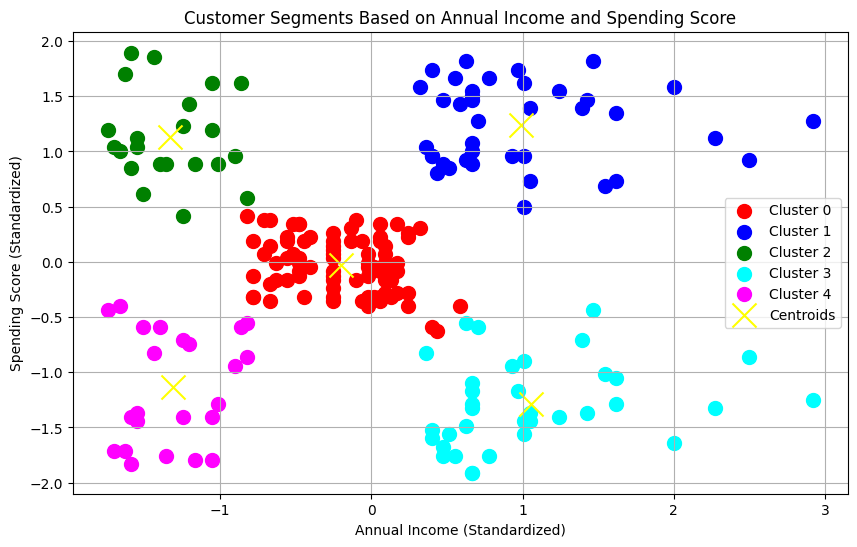

In [10]:
# Visualize the clusters
plt.figure(figsize=(10, 6))

# Plot each cluster with different colors
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 0')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 4, 0], X_scaled[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 4')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', marker='x', label='Centroids')

# Add labels and title
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')
plt.legend()
plt.grid(True)
plt.show()